### CNN Model for the Phishing Websites group project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msn
from scipy.io import arff
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score
import tensorflow as tf
from tensorflow.keras import layers, models

2023-12-08 03:27:51.274642: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
data = arff.loadarff('Training Dataset.arff')
df = pd.DataFrame(data[0])
df = df.apply(lambda col: col.str.decode('utf-8').str.strip("'"))

df.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [3]:
X = df.drop("Result", axis=1)
Y = df['Result']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

X_train = X_train.astype(float)
X_test = X_test.astype(float)
Y_train = Y_train.astype(float)
Y_test = Y_test.astype(float)

In [4]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape the input data to be 3D 
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

model = models.Sequential()

model.add(layers.Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))

model.add(layers.MaxPooling1D(pool_size=2))

model.add(layers.Flatten())

model.add(layers.Dense(64, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))  

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
111/111 [==============================] - 1s 5ms/step - loss: -7.1433 - accuracy: 0.1819 - val_loss: -28.1635 - val_accuracy: 0.2086
Epoch 2/10
111/111 [==============================] - 0s 3ms/step - loss: -97.2931 - accuracy: 0.2114 - val_loss: -225.6995 - val_accuracy: 0.1911
Epoch 3/10
111/111 [==============================] - 0s 3ms/step - loss: -439.8996 - accuracy: 0.1999 - val_loss: -803.3539 - val_accuracy: 0.2171
Epoch 4/10
111/111 [==============================] - 0s 3ms/step - loss: -1231.0635 - accuracy: 0.2096 - val_loss: -1943.0848 - val_accuracy: 0.2046
Epoch 5/10
111/111 [==============================] - 0s 3ms/step - loss: -2638.3828 - accuracy: 0.2028 - val_loss: -3825.7441 - val_accuracy: 0.2148
Epoch 6/10
111/111 [==============================] - 0s 3ms/step - loss: -4817.3535 - accuracy: 0.2030 - val_loss: -6606.4189 - val_accuracy: 0.2120
Epoch 7/10
111/111 [==============================] - 0s 3ms/step - loss: -7922.3110 - accuracy: 0.2107 - val_

In [5]:
predictions = model.predict(X_test)
predictions_binary = np.round(predictions)
accuracy = accuracy_score(Y_test, predictions_binary)
precision = precision_score(Y_test, predictions_binary, average='macro') 
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")



70/70 [==============================] - 0s 1ms/step
Accuracy: 0.1917684305744007
Precision: 0.32565284178187404


/Users/vanshmurad/.pyenv/versions/3.11.4/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Attempts at improving the score for the above base model

In [6]:
#Preprocessing data again to train a new model

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

X_train = X_train.astype(float)
X_test = X_test.astype(float)
Y_train = Y_train.astype(float)
Y_test = Y_test.astype(float)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# New Model
model = models.Sequential()
model.add(layers.Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5)) 
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)  
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [7]:
# Train the model with early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(X_train, Y_train, epochs=50, batch_size=64, validation_split=0.2, callbacks=[early_stopping])

predictions = model.predict(X_test)
predictions_binary = np.round(predictions)
accuracy = accuracy_score(Y_test, predictions_binary)
precision = precision_score(Y_test, predictions_binary, average='macro') 
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")



Epoch 1/50
111/111 [==============================] - 2s 5ms/step - loss: -4.7163 - accuracy: 0.1743 - val_loss: -18.9668 - val_accuracy: 0.1815
Epoch 2/50
111/111 [==============================] - 0s 3ms/step - loss: -65.2686 - accuracy: 0.2123 - val_loss: -155.3487 - val_accuracy: 0.1730
Epoch 3/50
111/111 [==============================] - 0s 3ms/step - loss: -297.5101 - accuracy: 0.2123 - val_loss: -557.2850 - val_accuracy: 0.1939
Epoch 4/50
111/111 [==============================] - 0s 3ms/step - loss: -848.0992 - accuracy: 0.2144 - val_loss: -1376.6670 - val_accuracy: 0.2052
Epoch 5/50
111/111 [==============================] - 0s 3ms/step - loss: -1895.5402 - accuracy: 0.2107 - val_loss: -2813.5291 - val_accuracy: 0.1939
Epoch 6/50
111/111 [==============================] - 0s 3ms/step - loss: -3524.6570 - accuracy: 0.2147 - val_loss: -4926.0283 - val_accuracy: 0.1922
Epoch 7/50
111/111 [==============================] - 0s 3ms/step - loss: -5943.0391 - accuracy: 0.2042 - val_l

/Users/vanshmurad/.pyenv/versions/3.11.4/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


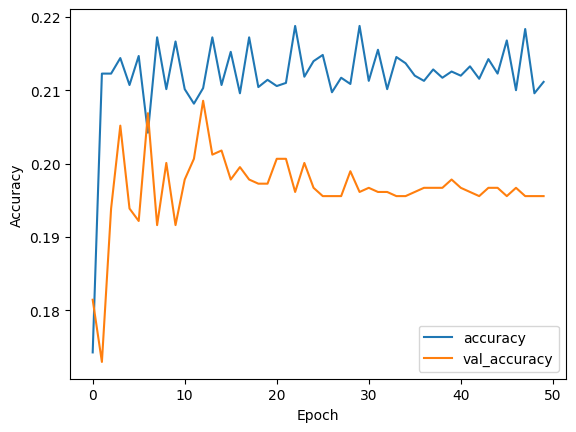

In [8]:
# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()
